**Chapter 2 监督学习**
- date: 2024-06-19
- author: Rui Zhu

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn

---
# 笔记
- 监督学习: 从给定的输入输出对中学习到方法, 再从另外输入中预测输出; 其主要有‘分类’和‘回归’两类问题
- 无监督学习: 只有输入数据是已知的, 没有为算法提供输出数据
- 泛化: 如果一个模型能够对没见过的数据作出准确预测, 则说该模型能够从训练集泛化到测试集
- 过拟合和欠拟合:
    1. 过拟合: 如果一个模型过分关注训练集的细节, 则会在训练集上表现很好, 但不能泛化到新数据上, 称其过拟合
    2. 欠拟合: 如果一个模型没有抓住数据的全部内容, 在训练集上表现都不好, 称其欠拟合
    3. 训练集和测试集之间的性能差异很小, 可能存在欠拟合; 差距很大, 可能存在过拟合
- 训练集越大(数据点变化范围越大), 在不发生过拟合的前提下, 可以使用的模型越复杂, 泛化能里越强
- 特征数量较少的数据集称为低维数据集; 反之称为高维数据集
- 低维数据集的方便可视化, 但是低维数据集得到的结论可能不适用于高维数据集
- 交互项: 由原始特征组合出来的特征, 也称导出特征
- 特征工程: 制作导出特征的方法

---
# 一些样本数据集

## 模拟的二分类数据集forge

X.shape: (26, 2)


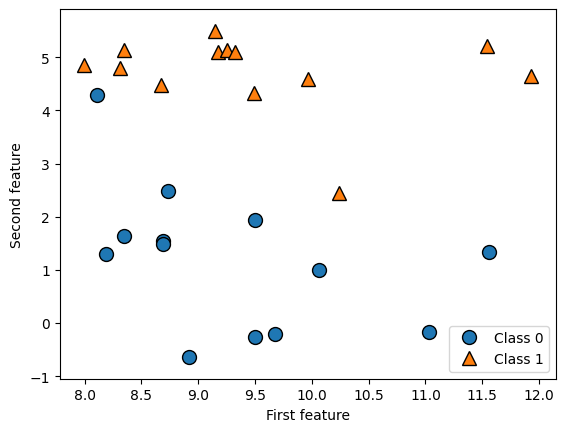

In [2]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

## 模拟的回归算法数据集wave

Text(0, 0.5, 'Target')

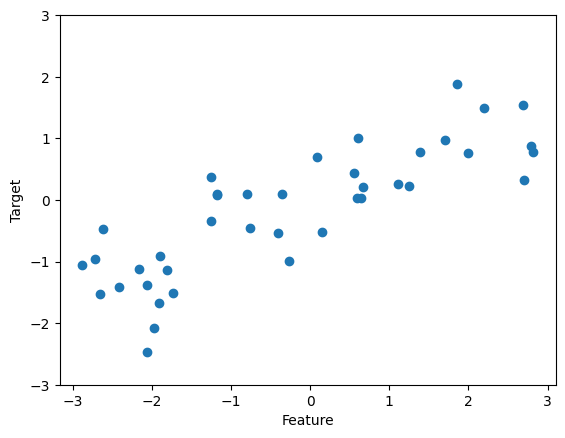

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

## 威斯康星州乳腺癌数据集cancer

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


## 波士顿房价数据集boston
* v1.2之后不可使用该数据集
* 手动下载: https://lib.stat.cmu.edu/datasets/

In [5]:
"""
原始数据集
"""
path = Path("./data/boston.txt")
raw_df = pd.read_csv(path, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print("data.shape: {}".format(data.shape))

data.shape: (506, 13)


In [6]:
"""
包含交互项的数据集
"""
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


---
# k近邻 (k-NN)

## 算法介绍
* k-NN算法是最简单的机器学习算法, 构建模型只需保存训练数据, 可以分类也可以回归
* 算法: 
    1. 在特征空间中, 找到预测点的k个最近邻(k=1, 2, 3, ...), 从这k个最近邻得到预测结果.
    2. 对于分类问题, 采用投票法, 预测结果服从多数
    3. 对于回归问题, 预测结果为邻居们的平均值
    4. k近邻分类器有2个重要参数: 邻居个数, 数据点之间的距离度量方法
    5. 实践中, 邻居个数3-5个往往得到比较好的结果; 距离度量方法默认使用欧式距离
* 优点:
    1. 容易理解
    2. 不用过多的调参
    3. 很容易快速构建, 是很好的基准方法
* 缺点:
    1. 需要对数据做较好的预处理
    2. 训练集特征数很多(多于几百)或者样本量很大, 预测速度会比较慢
    3. 对于大多数特征的大多数取值为0的数据集(稀疏数据集), 表现不好
* web
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#kneighborsclassifier
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#kneighborsregressor

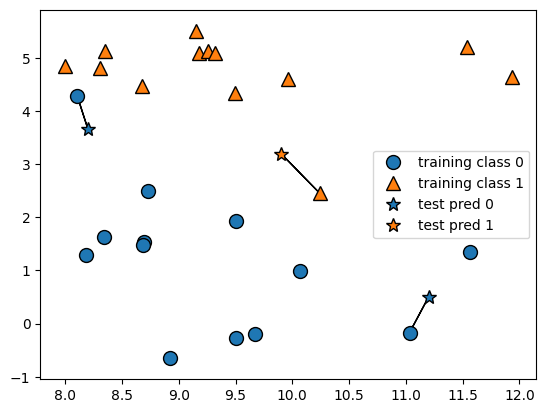

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

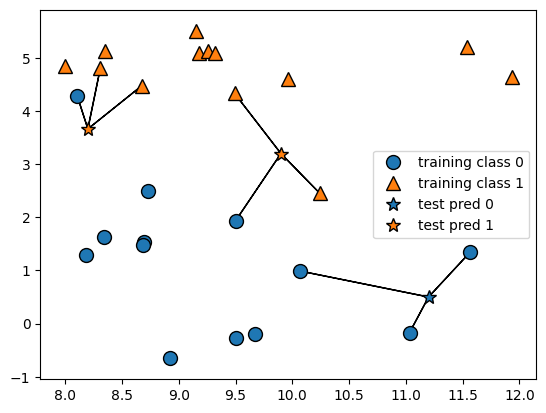

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

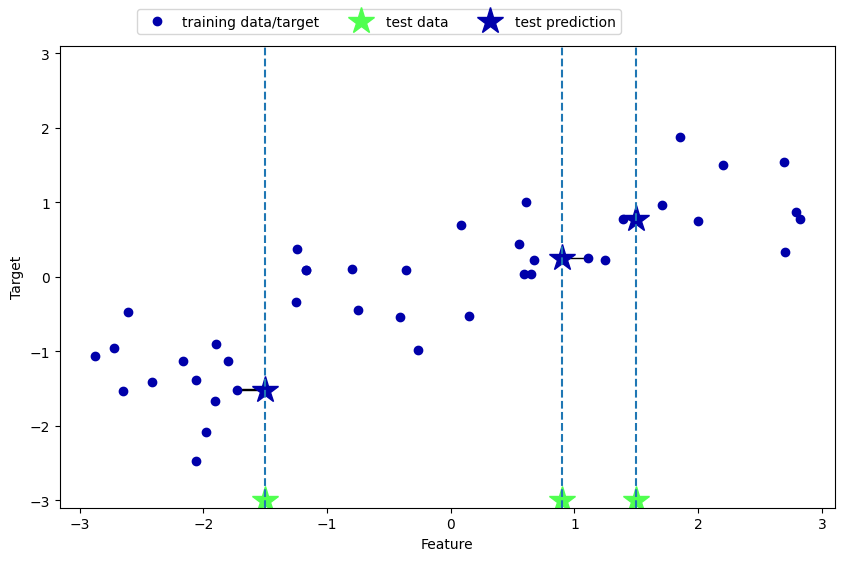

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

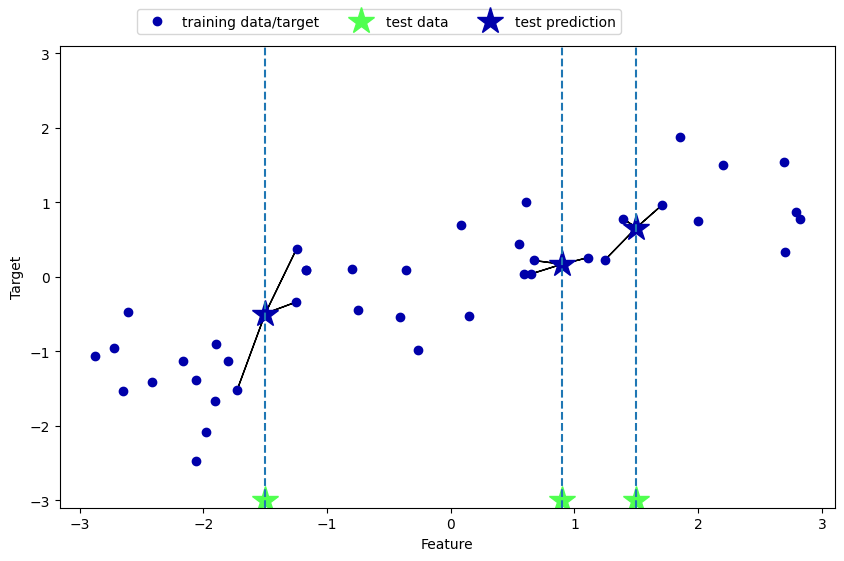

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## k近邻分类

In [11]:
"""
使用模拟数据集forge
"""
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# load the data
X, y = mglearn.datasets.make_forge()

# split the data with 75% in training and 25% in test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
clf = KNeighborsClassifier(n_neighbors=3)

# fit the model using the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Test set predictions: {y_pred}")
print(f"Test set accuracy: {clf.score(X_test, y_test):.2f}")

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


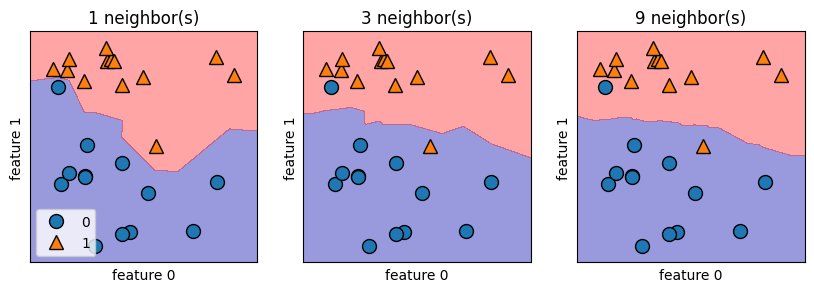

In [12]:
"""
绘制决策边界

分析:
* 邻居数量越多, 决策边界越平滑, 更平滑的边界对应更简单的模型, 模型复杂度越低
"""
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

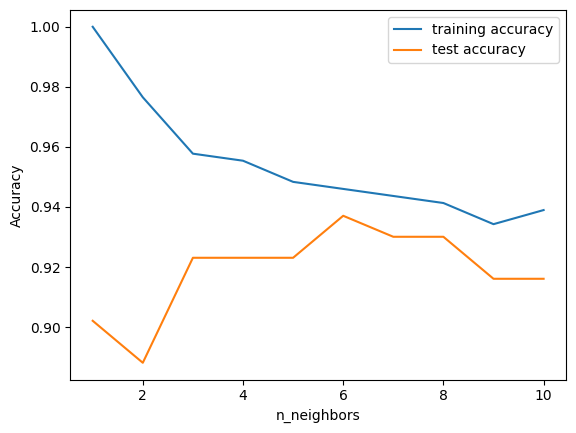

In [13]:
"""
使用真实数据集

分析:
* 邻居数量过少时, 模型复杂度高, 容易过拟合, 因此训练集上的准确率很高, 但测试集上的准确率很低
* 邻居数量过多时, 模型复杂度低, 容易欠拟合, 因此训练集和测试集上的准确率都很低
* 即便如此, 最差的性能也有88%的准确率
"""

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target,  # 确保训练集和测试集中的类别比例与原始数据集中的类别比例相同
                                                    random_state=66)

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## k近邻回归

In [14]:
"""
使用wave数据集
"""
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"Test set predictions:\n{y_pred}")
print(f"Test set R^2: {reg.score(X_test, y_test):.2f}")  # 对于回归问题, score返回的是R^2.值为1表示完美拟合

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


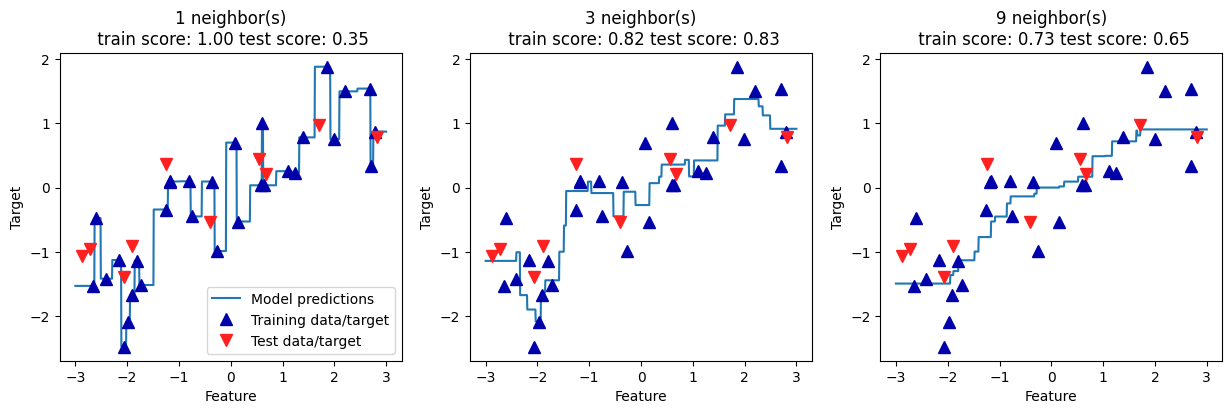

In [15]:
"""
不同邻居数量的KNeighborsRegressor的预测结果
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)  # 将一个一维数组转换为一个n行1列的二维数组

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

---
# 线性模型(回归)
* 优势: 
    1. 线性模型的训练速度非常快, 预测速度也很快, 并且可以推广到非常大的数据集, 对稀疏数据也很有效
    2. 易于理解和解释; 但如果数据集中包含高度相关的特征时, 可能很难对数据进行解释
    3. 特征数量大于样本数量时, 线性模型的表现通常都很好
* 注意LogisticRegression分类算法和岭回归, 有solver='sag'选项可以加速处理大型数据

## 线性回归
* 又称普通最小二乘法(ordinary least squares, OLS)
* 算法: 预测是特征的加权求和, 寻找模型参数w(数组)和b(浮点数), 通过计算均方误差, 找到使得均方误差最小的模型参数
* 均方误差(mean square error): 预测值和真实值之差的平方和除以样本数
* 最小二乘法没有超参数, 因此无法控制模型复杂度
* 缺点: 无法控制模型复杂度, 低维数据容易欠拟合, 高维数据容易过拟合

### 一维数据集上的表现
* 由于只有一个特征, 模型复杂度非常低, 过拟合的风险很低, 很容易欠拟合
* 而对于高维数据集, 线性模型将变得更加强大, 过拟合的风险也变大

In [16]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print(f"lr.coef_: {lr.coef_}")  # 斜率
print(f"lr.intercept_: {lr.intercept_}") # 截距
# * sklearn中学到的参数都带下划线, 为了跟用户设置的参数区分开

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976


In [17]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")
# * 训练集和测试集上的分数接近, 说明可能存在欠拟合

Training set score: 0.67
Test set score: 0.66


### 多维数据集上的表现

In [18]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")
# * 训练集上的分数远高于测试集上的分数, 说明可能存在过拟合

Training set score: 0.95
Test set score: 0.61


## 岭回归 (Ridge regression)
* 介绍: 为解决OLS方法在高维数据中容易过拟合的问题, 在OLS的目标函数的基础上, 使用L2正则化作为惩罚项
* 优势: 
    1. 对OLS做显式约束, 避免过拟合
    2. 通过alpha参数, 调节模型复杂度, 调节模型的泛化能力
* alpha参数:
    1. alpha用于指定正则化的强度, 数值等于0时为不约束, 相当于OLS
    2. alpha越大, 会得到更小的拟合系数

In [19]:
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge = Ridge().fit(X_train, y_train)

print(f"Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge.score(X_test, y_test):.2f}")

Training set score: 0.89
Test set score: 0.75


In [20]:
"""
不同alpha值对模型泛化能力的影响
"""
for alpha in [0, 0.1, 1, 10]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    print(f"alpha = {alpha} | "
          f"training set score: {ridge.score(X_train, y_train):.2f} | "
          f"test set score: {ridge.score(X_test, y_test):.2f}")


alpha = 0 | training set score: 0.95 | test set score: 0.60
alpha = 0.1 | training set score: 0.93 | test set score: 0.77
alpha = 1 | training set score: 0.89 | test set score: 0.75
alpha = 10 | training set score: 0.79 | test set score: 0.64


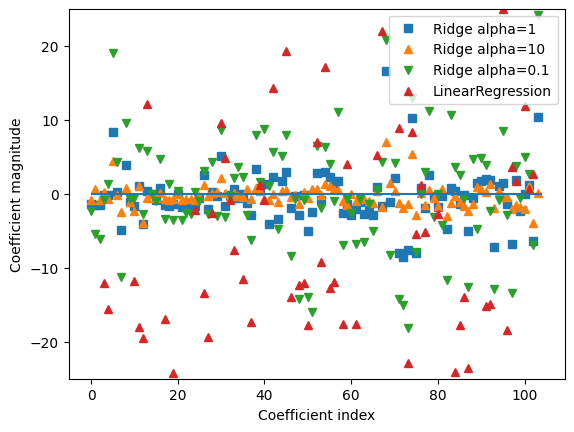

In [21]:
"""
更大的alpha表示更强的约束, 得到的模型系数更小
"""

ridge = Ridge(alpha=1).fit(X_train, y_train)
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

lr = LinearRegression().fit(X_train, y_train)
plt.plot(lr.coef_, '^', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

### 学习曲线
* 在数据量逐渐增加的子数据集上对模型进行评估
* 下图为波士顿房价训练集的线性回归和岭回归的学习曲线, 有以下结论:
    1. 对于全部数据集大小, 训练分数高于测试分数
    2. 岭回归的训练分数低于线性回归, 因为岭回归是正则化的
    3. 岭回归的测试分数更高, 特别是在训练集样本量小于400时, 线性回归学不到任何
    4. 训练集样本量增大, 两个模型的测试分数均升高, 最终线性回归将与岭回归具有相同的性能

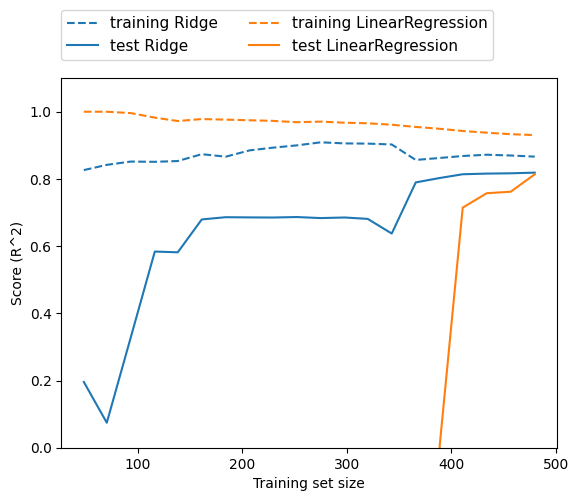

In [22]:
mglearn.plots.plot_ridge_n_samples()  # 这段代码要跑2min

## lasso
* 与岭回归的区别是使用了L1正则化
* L1正则化的结果是: 某些系数刚好为0, 即某些特征被模型忽略, 即模型自动完成了特征选择
* lasso的正则化强度参数alpha:
    1. alpha控制模型系数趋近于0的强度
    2. 默认值是1
    3. alpha设置太大容易欠拟合, 使用的特征数量很少
    4. alpha设置太小会过拟合, 使用全部特征, 测试分数很接近OLS
* 实践中, 一般首选岭回归; 除非特征很多, 认为其中几个是重要的
* sklearn还提供的Lasso和Ridge的组合: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), 结合了两者的惩罚项; 代价是需要调节两个参数, 分别用于L1和L2的正则化

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=100000).fit(X_train, y_train)  # max_iter: 最大迭代次数
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")  # 只使用了4个特征

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [24]:
"""
alpha设置恰当才会有较好的泛化能力
"""
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)  # max_iter: 最大迭代次数
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [25]:
"""
alpha设置过小, 模型很复杂, 容易过拟合, 结果接近OLS
"""
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)  # max_iter: 最大迭代次数
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Text(0, 0.5, 'Coefficient magnitude')

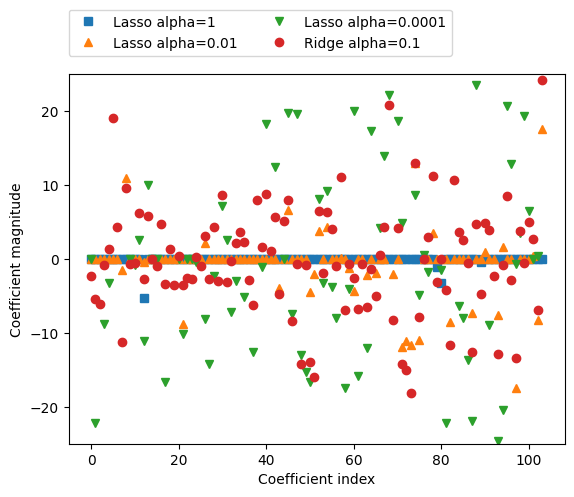

In [26]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

---
# 线性模型(分类)
* 最常见的线性分类算法: Logistic回归和线性支持向量机(liner support vector machine, 线性SVM)
* LogisticRegression和linerSVM的正则化强度参数C: C值越大, 正则化越弱

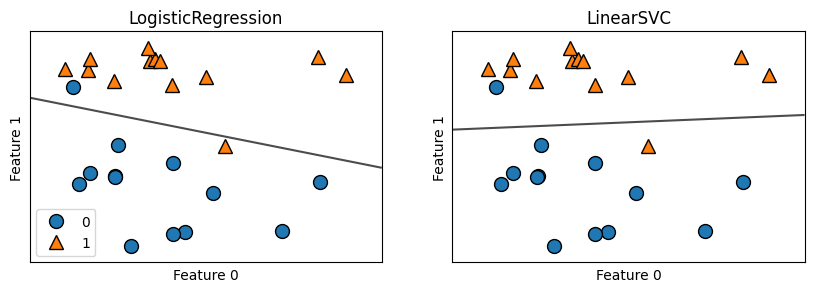

In [27]:
"""
在forge数据集上可视化LogisticRegression和LinearSVC的决策边界
"""
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

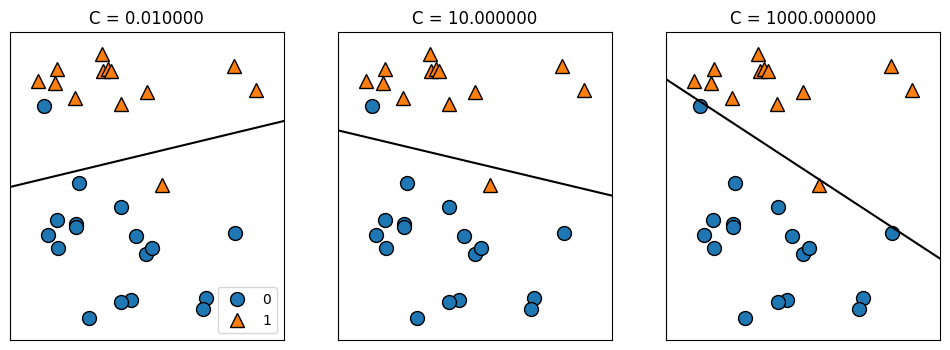

In [28]:
"""
C值越小, 正则化越强, 模型会选择一条相对水平的线
"""
mglearn.plots.plot_linear_svc_regularization()

### 多维数据集上的LogisticRegression实战

In [29]:
"""
多维数据集上的LogisticRegression实战
"""
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)  # 默认C=1
print(f"Training set score: {logreg.score(X_train, y_train):.2f}")
print(f"Test set score: {logreg.score(X_test, y_test):.2f}")  # 欠拟合

Training set score: 0.96
Test set score: 0.96


In [30]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print(f"Training set score: {logreg100.score(X_train, y_train):.2f}")
print(f"Test set score: {logreg100.score(X_test, y_test):.2f}")  # 更复杂的模型可能表现更好

Training set score: 0.98
Test set score: 0.97


In [31]:
logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)  # 降低C值, 增强正则化, 模型复杂度降低, 欠拟合
print(f"Training set score: {logreg001.score(X_train, y_train):.2f}")
print(f"Test set score: {logreg001.score(X_test, y_test):.2f}")

Training set score: 0.95
Test set score: 0.95


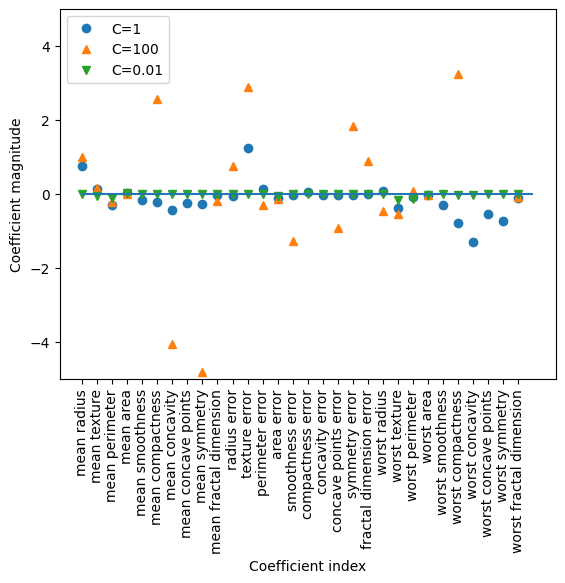

In [32]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [33]:
"""
与线性模型的回归算法类似, 有表示正则化强度的参数C;
此外还有惩罚项选择参数penalty, 可以选择l1或l2, 不同的正则化方案选择, 也会影响使用全部特征还是部分特征
"""
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear", max_iter=10000).fit(X_train, y_train)
    print(f"Training accuracy of l1 logreg with C={C}: {lr_l1.score(X_train, y_train):.2f}")
    print(f"Test accuracy of l1 logreg with C={C}: {lr_l1.score(X_test, y_test):.2f}")

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1: 0.96
Test accuracy of l1 logreg with C=1: 0.96
Training accuracy of l1 logreg with C=100: 0.99
Test accuracy of l1 logreg with C=100: 0.98


### 多分类
* 将二分类推广到多分类的常见方法是“一对其余”

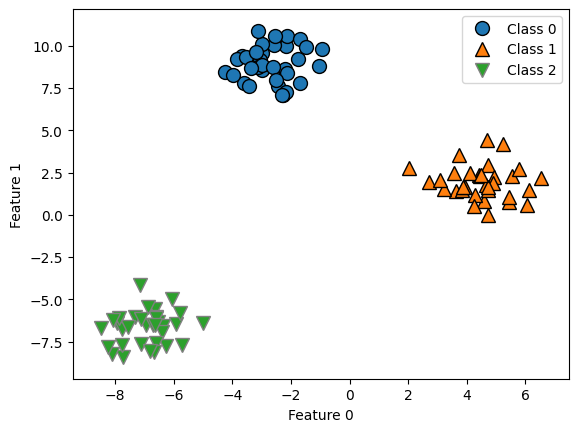

In [34]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)  # 创建一个3分类数据集
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [35]:
liner_svm = LinearSVC().fit(X, y)
print(f"Coefficient shape: {liner_svm.coef_.shape}")
print(f"Intercept shape: {liner_svm.intercept_.shape}")

Coefficient shape: (3, 2)
Intercept shape: (3,)


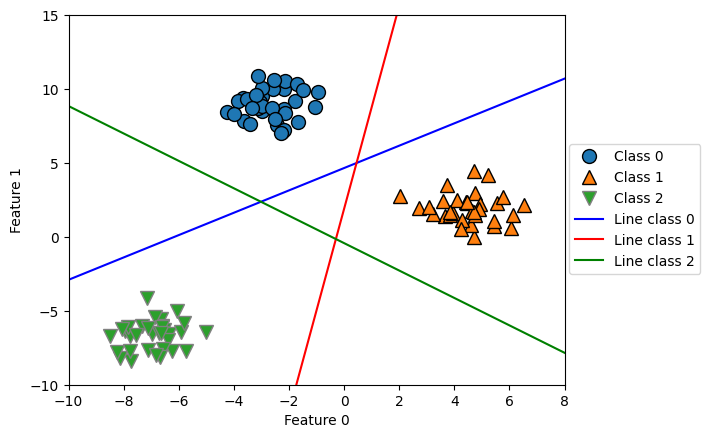

In [36]:
"""
可视化分类器的决策边界
"""
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(liner_svm.coef_, liner_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

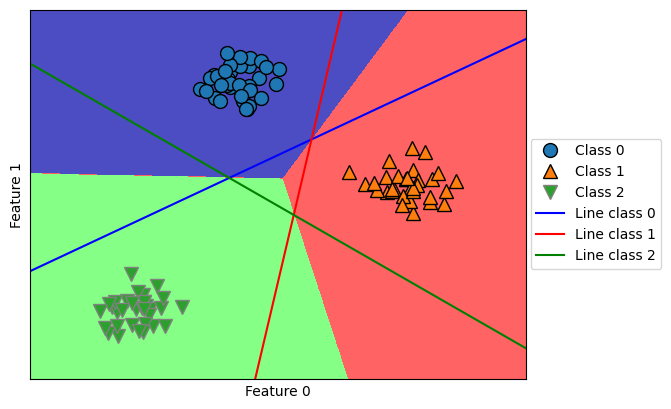

In [37]:
"""
可视化预测结果
"""
mglearn.plots.plot_2d_classification(liner_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(liner_svm.coef_, liner_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

---
# 朴素贝叶斯分类器
* 简介: 与线性分类器非常相似的分类器, 优点是训练速度快, 但泛化性能比线性分类器稍差
* sklearn中提供三种朴素贝叶斯分类器: GaussianNB, BernoulliNB, MultinomialNB
* GaussianNB可应用于任意连续数据; BernoulliNB和NultinomialNB主要用于文本数据
* BernoulliNB和NultinomialNB都只有一个参数alpha, 用于控制模型复杂度
* alpha越大, 训练集平滑化越强, 模型复杂度越低; 不过算法对alpha不敏感
* 朴素贝叶斯分类器也是很好的基准模型, 常用于非常大的数据集

---
# 决策树
* 决策树广泛应用于分类和回归任务
* 本质上, 它从一层层的if/else问题中进行学习, 并得出结论
* 决策树相关术语:
    1. 顶节点: 对整个数据集进行划分的第1个问题
    2. 叶节点: 决策树中的每一个节点表示一个问题, 最终只有答案的节点称为叶节点
    3. 测试: 在机器学习中, 这些问题叫做测试
    4. 纯的: 如果书中某个叶节点所包含的目标值都相同, 那么这个叶节点就是纯的
* 决策树的过程: 
    1. (训练过程)对数据集反复迭代进行测试, 划分, 直到划分后的每个区域只包含单一目标值(单一类别/回归值)
    2. (预测过程)从根节点开始遍历, 找到预测点在特征空间中的所属区域, 该区域的多数目标值(纯的叶节点则为单一目标值)作为预测结果
    3. 回归任务的预测结果为所属叶节点的平均目标值
* 控制决策树的复杂度:
    - 上面提到的决策树过程, 如果直到所有叶节点都是纯的, 会导致模型非常复杂, 严重过拟合
    - 防止过拟合有两种策略:
        1. **预剪枝(pre-pruning)**: 及早停止树的生长
        2. **后剪枝(post-pruning)也称剪枝(pruning)**: 随后删除或折叠信息量很少的节点
    - 预剪枝的限制条件可能包括: 限制树的最大深度、限制结点数量、规定一个结点中数据点的最小数目
    - scikit-learn中只实现了预剪枝, 没有后剪枝
* 优点:
    1. 得到的模型容易可视化(特征重要性)
    2. 算法不受数据缩放的影响, 因此不需要归一化或标准化等数据预处理步骤
* 缺点:
    1. 做回归时, 不能预测训练特征范围外的数据
    2. 即使做了预剪枝, 单棵决策树也经常过拟合, 泛化能力差

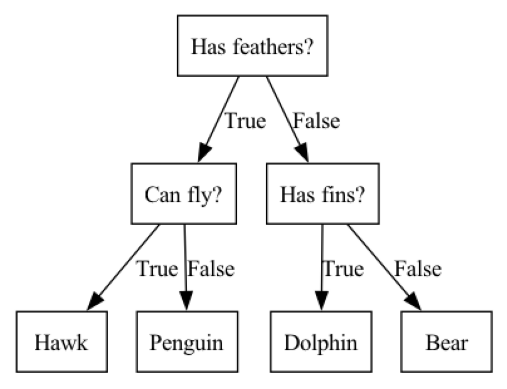

In [38]:
mglearn.plots.plot_animal_tree()

## cancer数据集实战

In [39]:
"""
cancer数据集实战

结论:
1. 未剪枝的的树容易过拟合, 对新的数据的泛化能力不佳
2. max_depth参数可以限制树的深度, 从而限制模型的复杂度, 从而避免过拟合
"""

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(f"Training set score: {tree.score(X_train, y_train):.2f}")
print(f"Test set score: {tree.score(X_test, y_test):.2f}")

print(f"\n--- 进行预剪枝 ---")
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print(f"Training set score: {tree.score(X_train, y_train):.2f}")
print(f"Test set score: {tree.score(X_test, y_test):.2f}")

Training set score: 1.00
Test set score: 0.94

--- 进行预剪枝 ---
Training set score: 1.00
Test set score: 0.95


## 可视化树
* 这棵决策树只有4层, 就已经很大了, 所以深度更大的树即便画出来可能也难以解释
* 特征重要性: 最常用的属性用于解释树的工作原理; 其使用0-1的数字表示每个特征的重要性, 0表示没用到, 1表示完美预测
* 全部特征的特征重要性求和为1

### 绘制决策树

In [40]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

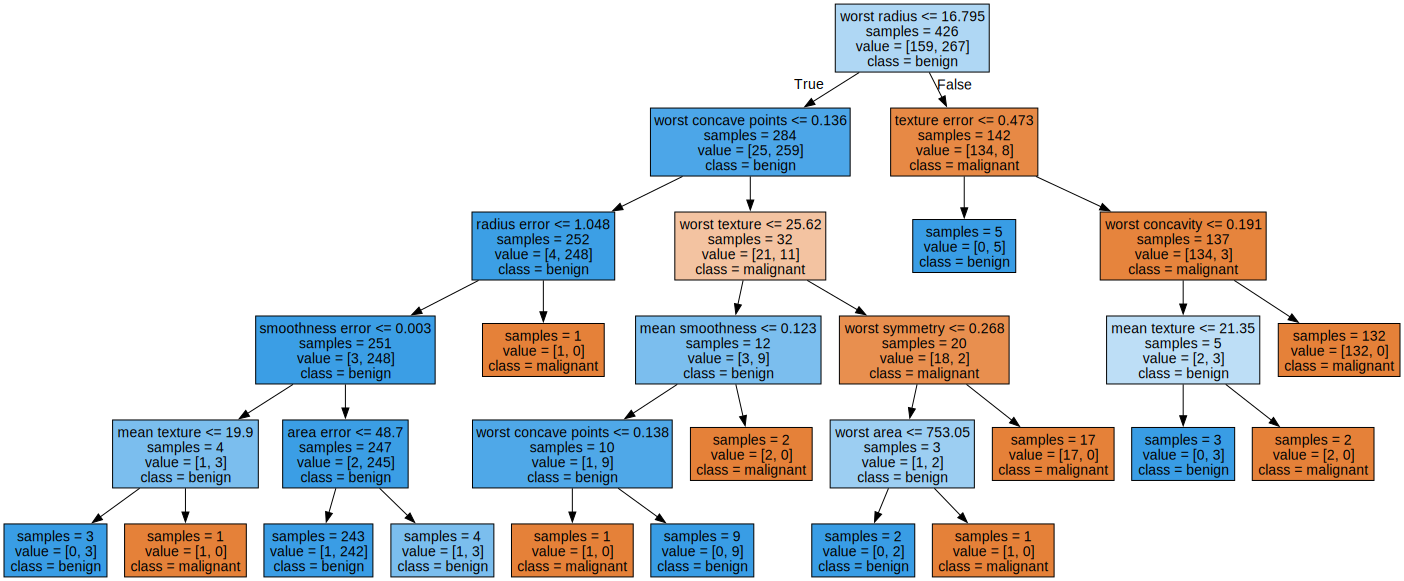

In [41]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 绘制特征重要性
* 特征重要性低不能说明这个特征没有提供任何信息, 只能说该特征没有被该树选中, 可能因为另外一个特征也包含了同样的信息
* 特征和类型可能不是单调的, 可能过大和过小属于一类, 中间态属于另一类

In [42]:
print(f"Feature importances:\n{tree.feature_importances_}")

Feature importances:
[0.         0.01991644 0.         0.         0.01378831 0.
 0.         0.         0.         0.         0.0099313  0.04713547
 0.         0.00243002 0.00235257 0.         0.         0.
 0.         0.         0.70786451 0.03236422 0.         0.00680904
 0.         0.         0.01771345 0.1281193  0.01157537 0.        ]


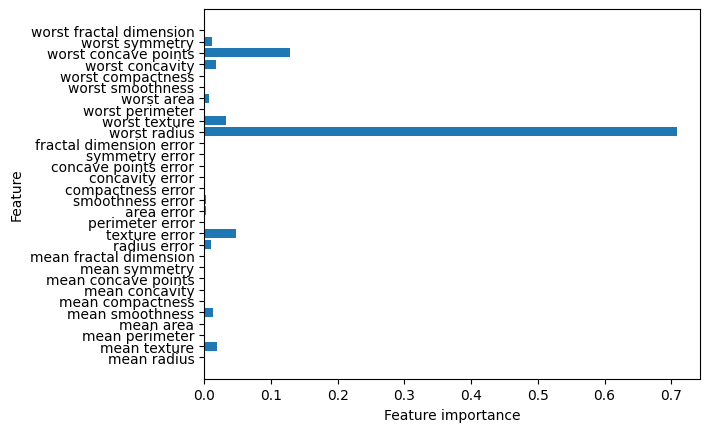

In [43]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(range(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


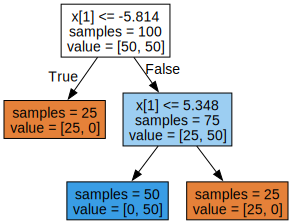

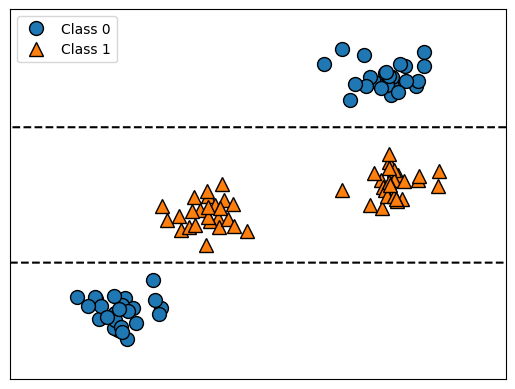

In [44]:
"""
例子: 说明y轴表示的特征与类别标签可能不是简单的单调关系
"""
tree= mglearn.plots.plot_tree_not_monotone()
display(tree)

## 用于回归的决策树
* 回归的决策树与分类的决策树所有内容都是一样的
* 注意: 基于树的回归模型不能外推, 也不能在训练数据范围之外进行预测 (因为训练时就没创建对应的测试, 自然不能外推)

Text(0, 0.5, 'Price in $/Mbyte')

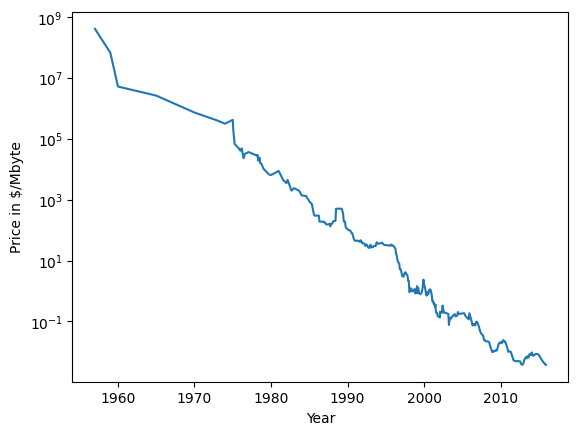

In [45]:
"""
实战: 数据集RAM的价格随年份的变化
- 使用年份作为特征, 价格作为目标
"""
import pandas as pd
ram_prices = pd.read_csv("data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

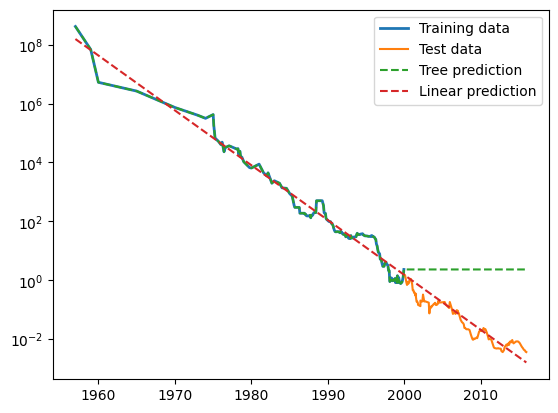

In [46]:
"""
举例说明: 决策树不能预测超出训练数据范围的数据, 而线性模型可以
"""

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train['date'].array.reshape(-1, 1)
y_train = np.log(data_train['price'])

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices['date'].array.reshape(-1, 1)

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

plt.semilogy(data_train.date, data_train.price, lw=2, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, np.exp(pred_tree), '--', label="Tree prediction")
plt.semilogy(ram_prices.date, np.exp(pred_lr), '--', label="Linear prediction")
plt.legend()

---
# 决策树集成(随机森林&梯度提升决策树)
* 集成: 组合过个机器学习模型来构建更强大的模型
* 常见的决策树集成方法有: 随机森林和梯度提升决策树


## 随机森林
* 单棵树的主要缺点是经常对训练数据过拟合, 随机森林是解决这个问题的一个方法
* 概述: 随机森林本质上是许多决策树的集合. 没棵树的预测可能都很好但是过拟合, 通过对树的结果取平均值来降低过拟合, 增强泛化能力
* 随机森林名称的由来: 将随机性添加到树的构造中, 以确保每棵树都各不相同
* 参数:
  * n_estimators: 用于构造的树的个数, 算法对每个树进行不同的随机选择, 确保树和树之间是有区别的; 通常选择几百或上千棵, 越大越好
  * max_features: 随机森林算法要求每个结点的测试使用的特征是全部特征中的一个子集, 子集的大小max_features设定; 较小的max_features可以降低过拟合, 一般默认值就行
  * max_depth: 单颗决策树的最大深度(预剪枝)
  * bootstrap sample(自助采样): 有放回的从原始数据集随机去除n_samples个数据点, 取n_samples个
  * 每棵树用到的数据集都是boostrap sample, 并且同一颗树的不同节点用到的特征(全部特征的子集)各不相同, 因此保证了随机分林中的树都不相同
* 优点:
    1. 通常不需要反复调节参数, 也不需要数据缩放
    2. n_jobs参数可以CPU多核心加速学习过程
    3. 树越多, 结果约鲁棒; 固定random_state可以重现结果
* 缺点:
    1. 对于维度非常高的稀疏数据(比如文本数据), 随机森林的表现往往不是很好

### two_moons数据集实战

Training set score: 0.96
Test set score: 0.92


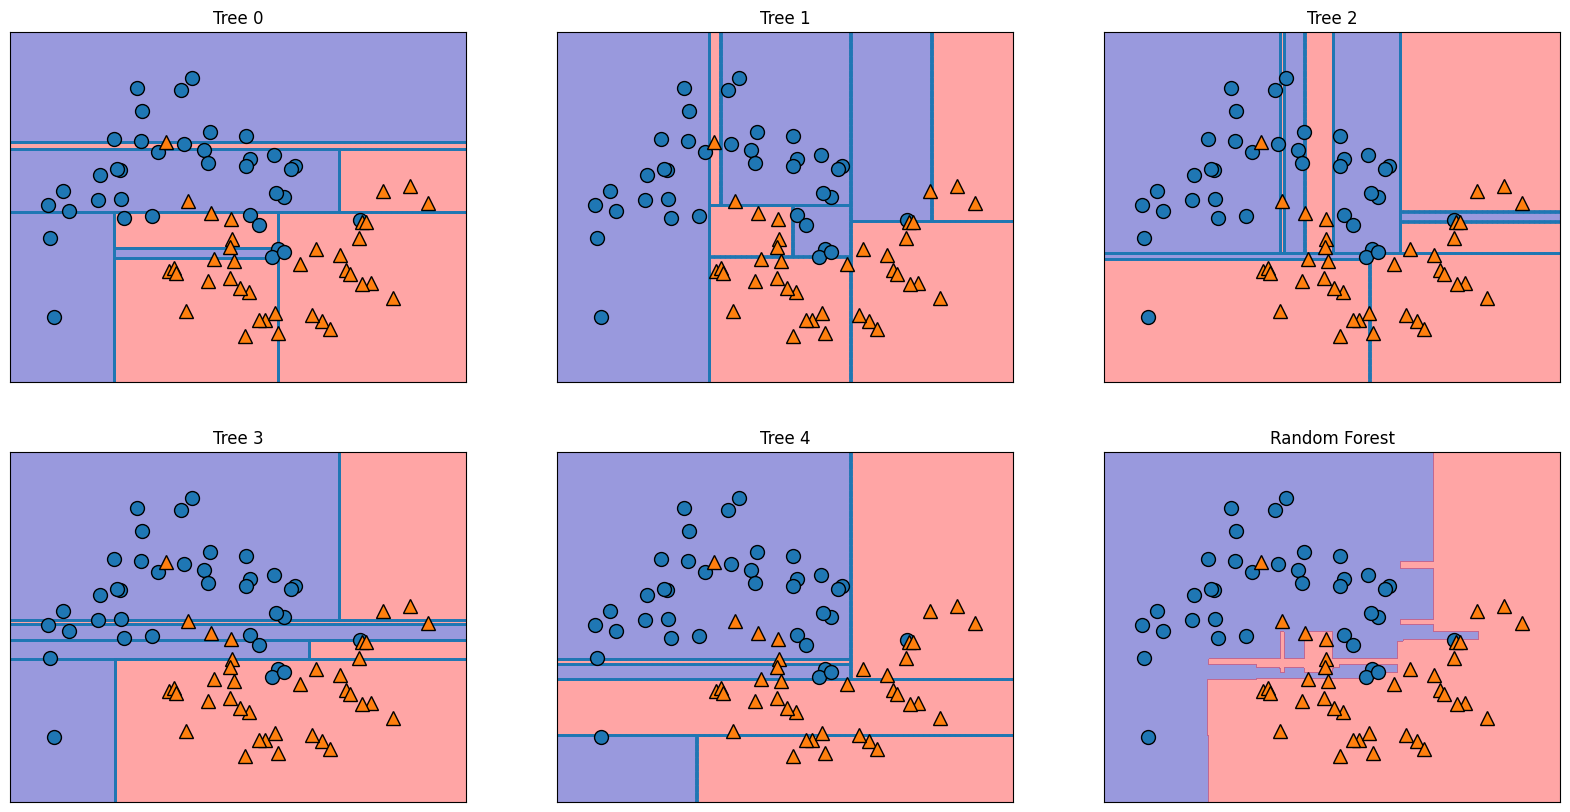

In [47]:
"""
two_moons数据集实战
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


# 可视化决策边界
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

print(f"Training set score: {forest.score(X_train, y_train):.2f}")
print(f"Test set score: {forest.score(X_test, y_test):.2f}")

### cancer数据集实战

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, max_features=15, random_state=0)
forest.fit(X_train, y_train)

print(f"Training set score: {forest.score(X_train, y_train):.3f}")
print(f"Test set score: {forest.score(X_test, y_test):.3f}")

Training set score: 1.000
Test set score: 0.979


### 特征重要性
* 计算方法是将随机森林中的全部树的特征重要性求和取平均
* 由于随机性, 算法对数据考虑了多种可能的解释, 因此随机森林比单颗树更能从总体把握数据特征

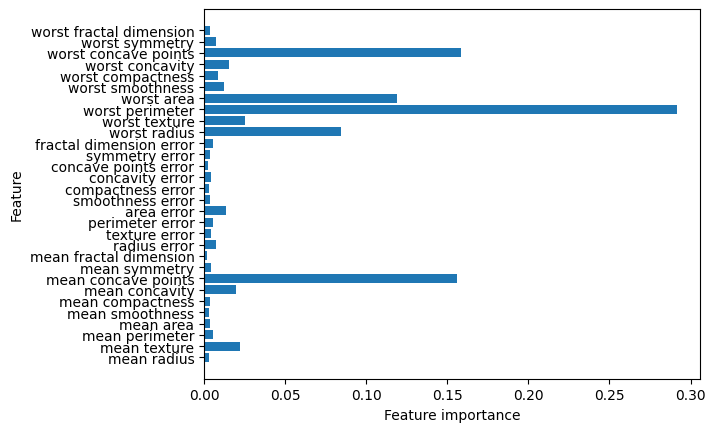

In [49]:
plot_feature_importances_cancer(forest)

## 梯度提升树(梯度提升机)
* 既可以用分类也可以做回归
* 概述: 与随机森林不同, 梯度提升采用连续的方式构造树, 每棵树都试图纠正前一棵树的错误
* 特点:
    1. 默认情况下, 梯度提升没有随机化, 而是用到了强预剪枝
    2. 梯度提升通常使用的深度很小的树(1-5), 模型占用的内存更少, 预测速度更快
* learning_rate(学习率): 用于控制每棵树纠正前一棵树的错误的强度; 高学习率模型更复杂
* 增大n_estimators也会增加模型复杂度
* 选择随机森林还是梯度提升树?
    1. 优先尝试随机森林, 它的鲁棒性很好. 如果随机森林的效果很好, 但预测时间太长, 再使用梯度提升树
    2. 若要将梯度提升应用到大规模问题上, 可以使用xgboost
* 优点:
    1. 同随机森林, 不需要数据缩放
* 缺点:
    1. 需要仔细调参, 训练时间可能比较长
    2. 不适用高维稀疏数据
* 参数:
    1. n_estimators: 树的数量, 不同于随机森林(随机森林n_estimators越大越好), 梯度提升的n_estimators增大会导致模型更复杂
    2. learning_rate: 学习率, 学习率与n_estimators高度相关, 因为越低的学习率就需要更多的树来构建相似复杂度的模型; 一般先确定n_estimators, 然后遍历学习率
    3. max_depth: 每棵树的节点数量, 一般不超过5

### cancer数据集实战

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print(f"Training set score: {gbrt.score(X_train, y_train):.3f}")
print(f"Test set score: {gbrt.score(X_test, y_test):.3f}")

Training set score: 1.000
Test set score: 0.965


In [51]:
"""
限制max_depth, 降低模型复杂度
"""
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print(f"Training set score: {gbrt.score(X_train, y_train):.3f}")
print(f"Test set score: {gbrt.score(X_test, y_test):.3f}")

Training set score: 0.991
Test set score: 0.972


In [52]:
"""
降低学习率, 降低模型复杂度
"""
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.005)
gbrt.fit(X_train, y_train)

print(f"Training set score: {gbrt.score(X_train, y_train):.3f}")
print(f"Test set score: {gbrt.score(X_test, y_test):.3f}")

Training set score: 0.986
Test set score: 0.965


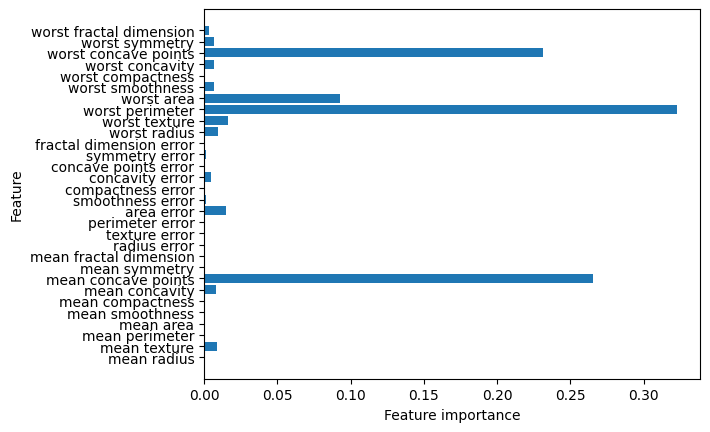

In [53]:
"""
特征重要性
"""
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

---
# 核支持向量机
* kernelized support vector machine(核支持向量机)简称SVM
* SVM可以同时用于分类(SVC)和回归(SVR)
* SVM是线性模型的改良
* 优点:
    1. SVM允许决策边界很复杂, 即使数据只有几个特征
    2. 在低维数据和高维数据上的表现都很好
* 缺点:
    1. 数据量10万以上可能比较慢
    2. 需要数据预处理和调参
    3. SVM很难检查, 很难理解为什么会这样预测

## 向线性模型添加非线性特征可以改良模型

Text(0, 0.5, 'Feature 1')

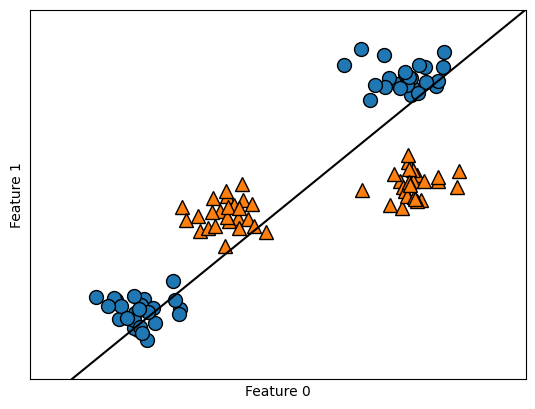

In [111]:
"""
线性模型在低维空间中可能非常受限, 因为线和平面的灵活性有限, 在有些数据集上不能线性划分

这个例子说明了线性模型只用1条直线可能无法给出好的结果
"""
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'feature1 ** 2')

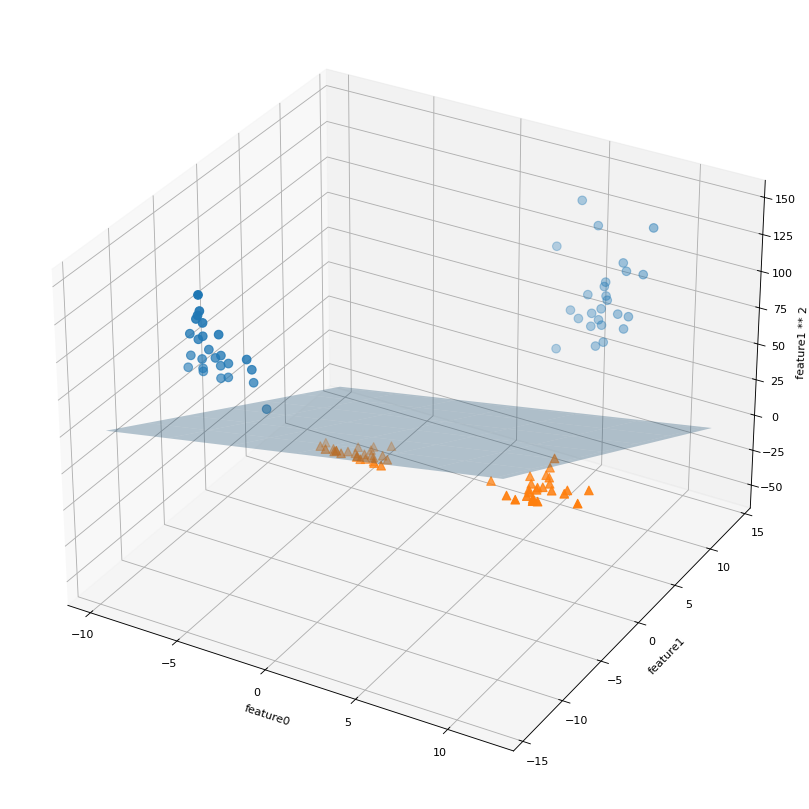

In [112]:
"""
扩展特征后, 可以使用线性模型进行分类
"""
X_new = np.hstack([X, X[:, 1:] ** 2])
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(12, 10), dpi=80, constrained_layout=True)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], marker='^', s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

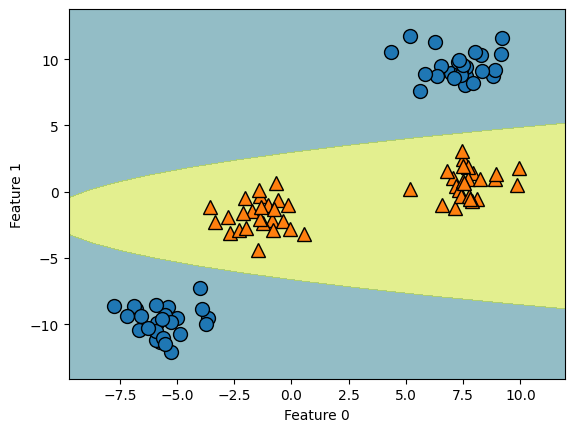

In [113]:
"""
这种操作会导致线性SVM不再是原始特征的线性函数,而是一个椭圆
"""
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 核技巧
* 上面的例子说明: 向数据中添加非线性特征, 可以让线性模型变得强大; 但通常来说, 我们并不知道要添加哪些特征
* 核技巧(kernel trick): 直接在高维空间中扩展特征表示中数据点之间的距离, 而不计算扩展特征
* SVM将数据映射到更高维空间中的两种常用方法: 
    1. 多项式核: 在一定阶数内计算原始特征所有可能的多项式
    2. 高斯核(也称径向基函数radial basis function, RBF): 考虑所有阶数的所有可能的多项式, 阶数越高, 特征重要性越小

## SVM方法概述
* 支持向量(support vector): SVM算法学习每个数据点对于决策边界的重要性, 通常只有一部分训练数据点对于定义决策边界是重要的, 这类数据点叫做支持向量
* SVM的预测: 测量与每个支持向量的距离, 分类策略由距离和该支持向量的重要性共同决定

### forge数据集实战

Text(0, 0.5, 'Feature 1')

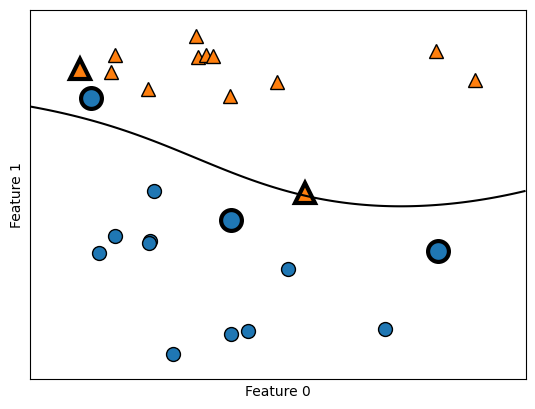

In [114]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_

# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## SVM调参
* gamma参数: 控制高斯核宽度, 控制点与点直接的距离测量; gamma越大, 决策边界越紧凑, 模型越复杂
* C参数: 正则化参数, 与线性模型类似, 限制每个点的重要性; C参数越大, 边界越弯曲, 模型越复杂
* 默认情况: C=1, gamma=1/n_features

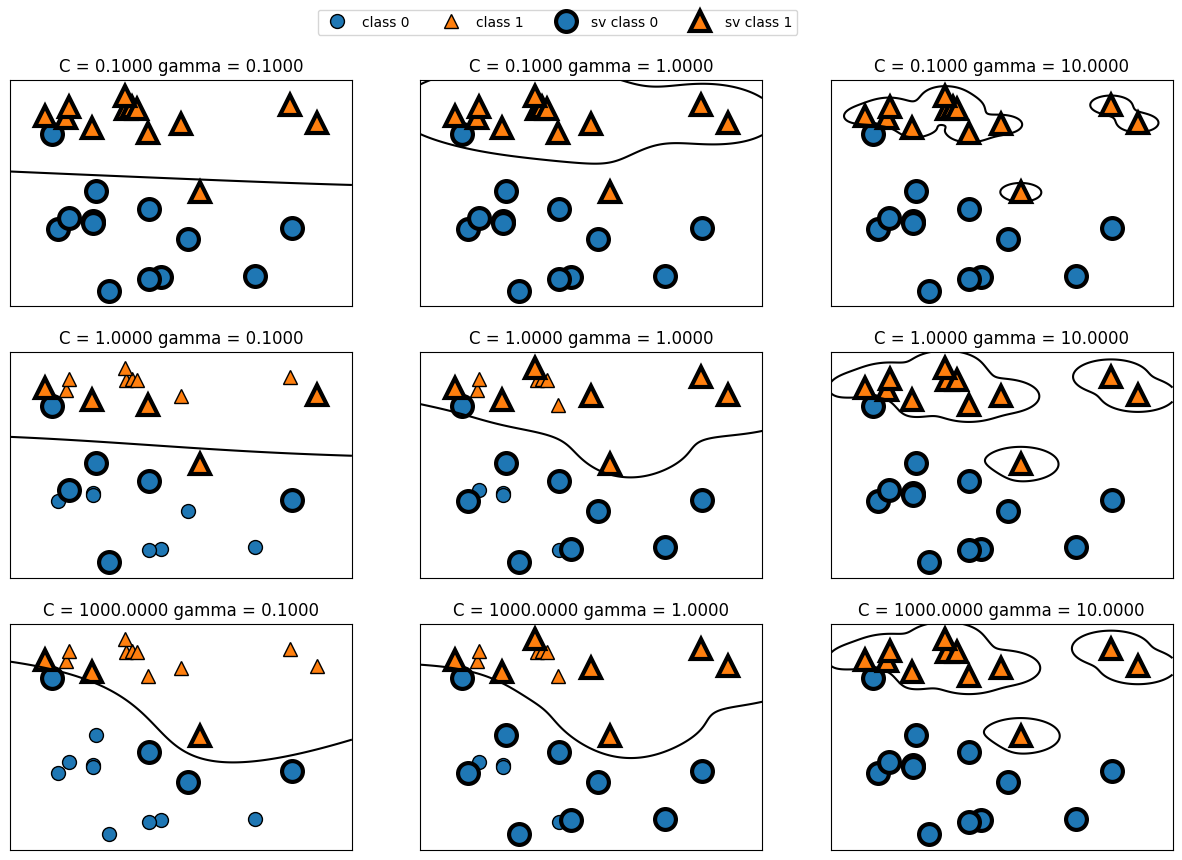

In [116]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4
                    , loc=(.9, 1.2))

## SVM对数据缩放敏感

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print(f"Training set score: {svc.score(X_train, y_train):.2f}")
print(f"Test set score: {svc.score(X_test, y_test):.2f}")

Training set score: 0.90
Test set score: 0.94


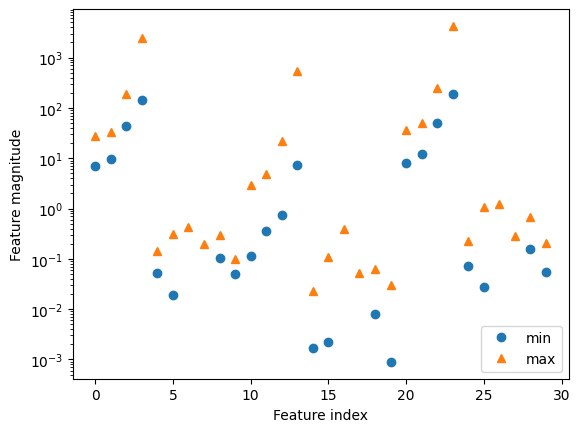

In [119]:
"""
cancer数据集的特征范围差异很大
"""
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [120]:
"""
特征缩放后的SVM
"""
# 将特征缩放到0-1之间
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)
print(f"Training set score: {svc.score(X_train_scaled, y_train):.3f}")
print(f"Test set score: {svc.score(X_test_scaled, y_test):.3f}")

Training set score: 0.984
Test set score: 0.972


---
# 神经网络